<a href="https://colab.research.google.com/github/Mirabelljoicelaura/PCVK/blob/main/Week9/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


KELOMPOK 8

Nama Anggota Kelompok :

1. Mirabell Joice Laura (2141720174)
2. M. Edwin Isa Alfais (2141720193)
3. Nabilah Amaalina Syafa (2141720198)

#Tugas Praktikum

## Langkah 1.
Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.


Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Langkah 2
Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##Langkah 3
Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

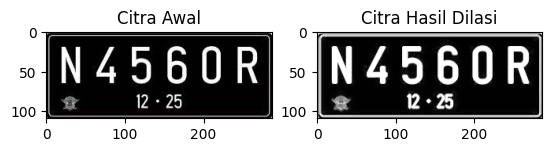

In [60]:

# Fungsi untuk melakukan dilasi
def dilate(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center = (k_height // 2, k_width // 2)

    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            max_val = 0
            for ky in range(k_height):
                for kx in range(k_width):
                    img_y = y + ky - k_center[0]
                    img_x = x + kx - k_center[1]
                    if img_y >= 0 and img_y < height and img_x >= 0 and img_x < width:
                        if kernel[ky, kx] == 1 and image[img_y, img_x] > max_val:
                            max_val = image[img_y, img_x]
            result[y, x] = max_val

    return result

# Load gambar sumber

img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Kernel cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Proses dilasi
dilation = dilate(img_gray, kernel)

#fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')

## Langkah 4
Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

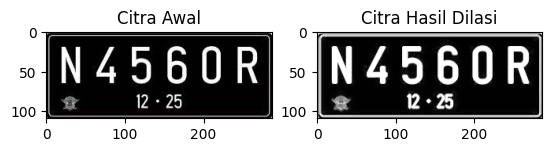

In [62]:
from google.colab.patches import cv2_imshow
import cv2

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kernel cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Lakukan dilasi
dilation = cv2.dilate(img_gray, kernel, iterations=1)

# Menampilkan citra asli dan hasil dilasi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')


##Langkah 5
Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


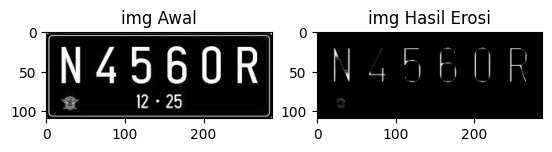

In [64]:
# Fungsi erosi
def erosi(img, se):
    tinggi, lebar = img.shape
    se_tinggi, se_lebar = se.shape
    se_center = (se_tinggi // 2, se_lebar // 2)

    hasil = np.zeros_like(img)

    for y in range(tinggi):
        for x in range(lebar):
            min_val = 255
            for i in range(se_tinggi):
                for j in range(se_lebar):
                    if se[i, j] == 1:
                        img_y = y + i - se_center[0]
                        img_x = x + j - se_center[1]
                        if 0 <= img_y < tinggi and 0 <= img_x < lebar:
                            min_val = min(min_val, img[img_y, img_x])
            hasil[y, x] = min_val

    return hasil

# Baca img
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Erosi (Square 5x5)
se = np.array([[1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1]], dtype=np.uint8)

# Terapkan erosi pada img
hasil_erosi = erosi(img, se)

# Menampilkan img asli dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('img Awal')
plt.subplot(122), plt.imshow(hasil_erosi, cmap='gray'), plt.title('img Hasil Erosi')
plt.show()


##Langkah 6
Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

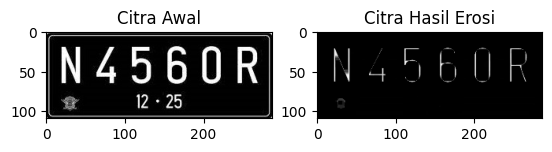

In [41]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Erosi (Square 5x5)
se = np.ones((5, 5), dtype=np.uint8)

# Lakukan erosi
erosion = cv2.erode(img, se, iterations=1)

# Menampilkan citra asli dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()


##Langkah 7
 Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology


### Tanpa menggunakan library

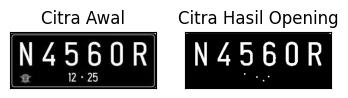

In [49]:
# Baca citra
image_opening = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', 0)
reto, thresho = cv2.threshold(image_opening, 127, 255, cv2.THRESH_BINARY)

k = 3
se = np.ones((k, k), np.uint8)

# Lakukan erosi dan dilasi
erosion = erosi(thresho, se)
dilation = dilate(erosion, se)

# Menampilkan citra asli dan hasil opening
plt.subplot(131), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

### Tanpa menggunakan library dengan ukuran kernel square 7x7

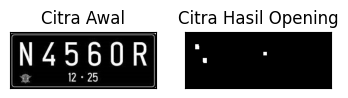

In [50]:
# Baca citra
image_opening = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', 0)
reto, thresho = cv2.threshold(image_opening, 127, 255, cv2.THRESH_BINARY)

k = 7
se = np.ones((k, k), np.uint8)

# Lakukan erosi dan dilasi
erosion = erosi(thresho, se)
dilation = dilate(erosion, se)

# Menampilkan citra asli dan hasil opening
plt.subplot(131), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

### Menggunakan Library

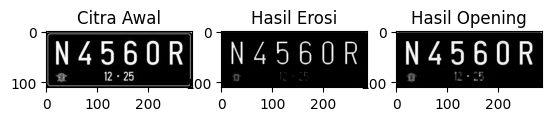

In [34]:
# Baca citra
citra = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3 dalam bentuk array
se = np.ones((3, 3), dtype=np.uint8)

# Lakukan erosi
erosion = erosi(citra, se)

# Lakukan dilasi pada hasil erosi
dilation = dilate(erosion, se)

# Menampilkan citra asli, hasil erosi, dan hasil opening
plt.subplot(131), plt.imshow(citra, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Hasil Erosi')
plt.subplot(133), plt.imshow(dilation, cmap='gray'), plt.title('Hasil Opening')
plt.show()


### Menggunakan library dengan kernel quare 7x7

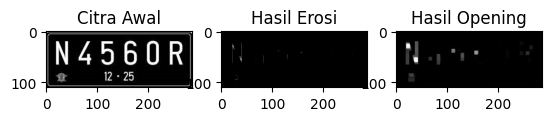

In [51]:
# Baca citra
citra = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3 dalam bentuk array
se = np.ones((7, 7), dtype=np.uint8)

# Lakukan erosi
erosion = erosi(citra, se)

# Lakukan dilasi pada hasil erosi
dilation = dilate(erosion, se)

# Menampilkan citra asli, hasil erosi, dan hasil opening
plt.subplot(131), plt.imshow(citra, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Hasil Erosi')
plt.subplot(133), plt.imshow(dilation, cmap='gray'), plt.title('Hasil Opening')
plt.show()


## Langkah 8
Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

### Menggunakan library

#### Kernel 3x3

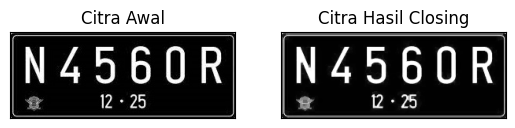

In [54]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Dilasi (Square 3x3)
se = np.ones((3, 3), np.uint8)

# Lakukan closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

#### Kernel 7x7 (sesuai jobsheet)

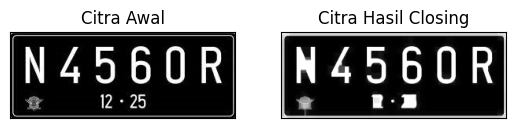

In [53]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Dilasi (Square 3x3)
se = np.ones((7, 7), np.uint8)

# Lakukan closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

### Tidak menggunakan library

#### Kernel 3x3

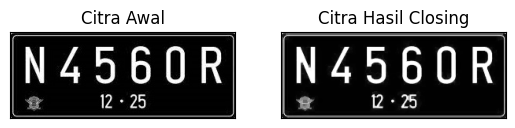

In [55]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), np.uint8)

# Lakukan dilasi dan erosi
dilation = dilasi(img, se)
closing = erosi(dilation, se)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()


#### Kernel 7x7

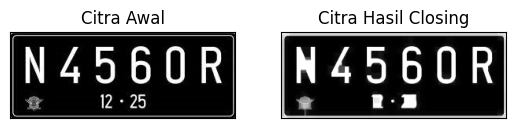

In [56]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
se = np.ones((7, 7), np.uint8)

# Lakukan dilasi dan erosi
dilation = dilasi(img, se)
closing = erosi(dilation, se)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()


##Langkah 9
 Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:


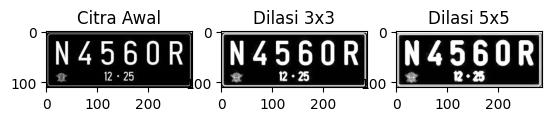

In [65]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Kernel Cross 3x3
kernel_3x3 = np.array([[0, 1, 0],
                      [1, 1, 1],
                      [0, 1, 0]], dtype=np.uint8)

# Kernel Cross 5x5
kernel_5x5 = np.array([[0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [1, 1, 1, 1, 1],
                      [0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0]], dtype=np.uint8)

# Proses dilasi dengan kernel 3x3
dilation_3x3 = dilate(img, kernel_3x3)

# Proses dilasi dengan kernel 5x5
dilation_5x5 = dilate(img, kernel_5x5)

# Menampilkan citra asli dan hasil dilasi
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilation_3x3, cmap='gray'), plt.title('Dilasi 3x3')
plt.subplot(133), plt.imshow(dilation_5x5, cmap='gray'), plt.title('Dilasi 5x5')
plt.show()

##Langkah 10
Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

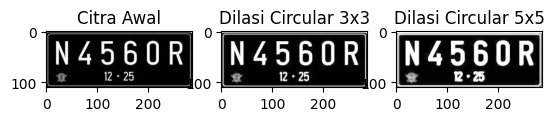

In [69]:
# Fungsi untuk membuat kernel berbentuk circular
def create_circular_kernel(radius):
    diameter = 2 * radius
    kernel = np.zeros((diameter, diameter), dtype=np.uint8)
    center = (radius, radius)

    for i in range(diameter):
        for j in range(diameter):
            if np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2) <= radius:
                kernel[i, j] = 1

    return kernel

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat kernel circular dengan radius 1 (3x3) dan 2 (5x5)
radius_3x3 = 1
radius_5x5 = 2
circular_kernel_3x3 = create_circular_kernel(radius_3x3)
circular_kernel_5x5 = create_circular_kernel(radius_5x5)

# Proses dilasi dengan kernel circular 3x3
dilation_circular_3x3 = cv2.dilate(img, circular_kernel_3x3, iterations=1)

# Proses dilasi dengan kernel circular 5x5
dilation_circular_5x5 = cv2.dilate(img, circular_kernel_5x5, iterations=1)

# Menampilkan citra asli dan hasil dilasi dengan kernel circular
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilation_circular_3x3, cmap='gray'), plt.title('Dilasi Circular 3x3')
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(133), plt.imshow(dilation_circular_5x5, cmap='gray'), plt.title('Dilasi Circular 5x5')
plt.show()


## Langkah 11
Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

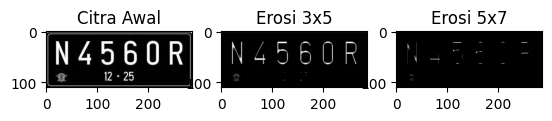

In [73]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat kernel berbentuk Rectangle 3x5
kernel_3x5 = np.ones((3, 5), np.uint8)

# Buat kernel berbentuk Rectangle 5x7
kernel_5x7 = np.ones((5, 7), np.uint8)

# Lakukan erosi dengan kernel 3x5
erosion_3x5 = erosi(img, kernel_3x5)

# Lakukan erosi dengan kernel 5x7
erosion_5x7 = erosi(img, kernel_5x7)

# Menampilkan citra asli dan hasil erosi
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion_3x5, cmap='gray'), plt.title('Erosi 3x5')
plt.subplot(133), plt.imshow(erosion_5x7, cmap='gray'), plt.title('Erosi 5x7')
plt.show()

## Langkah 12
 Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

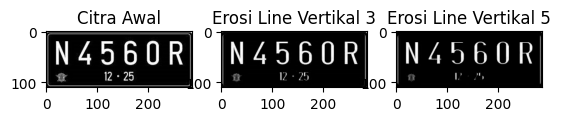

In [79]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat kernel berbentuk Line Vertikal 3
kernel_3 = np.ones((3, 1), np.uint8)

# Buat kernel berbentuk Line Vertikal 5
kernel_5 = np.ones((5, 1), np.uint8)

# Lakukan erosi dengan kernel 3
erosion_3 = erosi(img, kernel_3)

# Lakukan erosi dengan kernel 5
erosion_5 = erosi(img, kernel_5)

# Menampilkan citra asli dan hasil erosi
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion_3, cmap='gray'), plt.title('Erosi Line Vertikal 3')
plt.subplot(133), plt.imshow(erosion_5, cmap='gray'), plt.title('Erosi Line Vertikal 5')
plt.show()

## Langkah 13
Top Hat

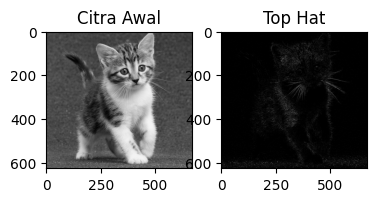

In [87]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat kernel berbentuk Square 5x5
kernel = np.ones((3, 3), np.uint8)

# Lakukan operasi Top Hat
top_hat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Menampilkan citra asli dan hasil Top Hat
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(top_hat, cmap='gray'), plt.title('Top Hat')
plt.show()


## Langkah 14
BlackHat

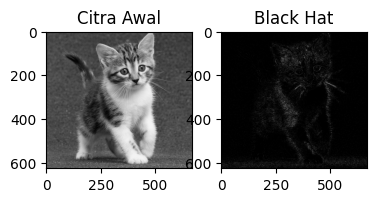

In [86]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat kernel berbentuk Square 5x5
kernel = np.ones((3, 3), np.uint8)

# Lakukan operasi Black Hat pada citra
black_hat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Menampilkan citra asli dan hasil Black Hat
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(black_hat, cmap='gray'), plt.title('Black Hat')
plt.show()


## Langkah 15
Skeleton

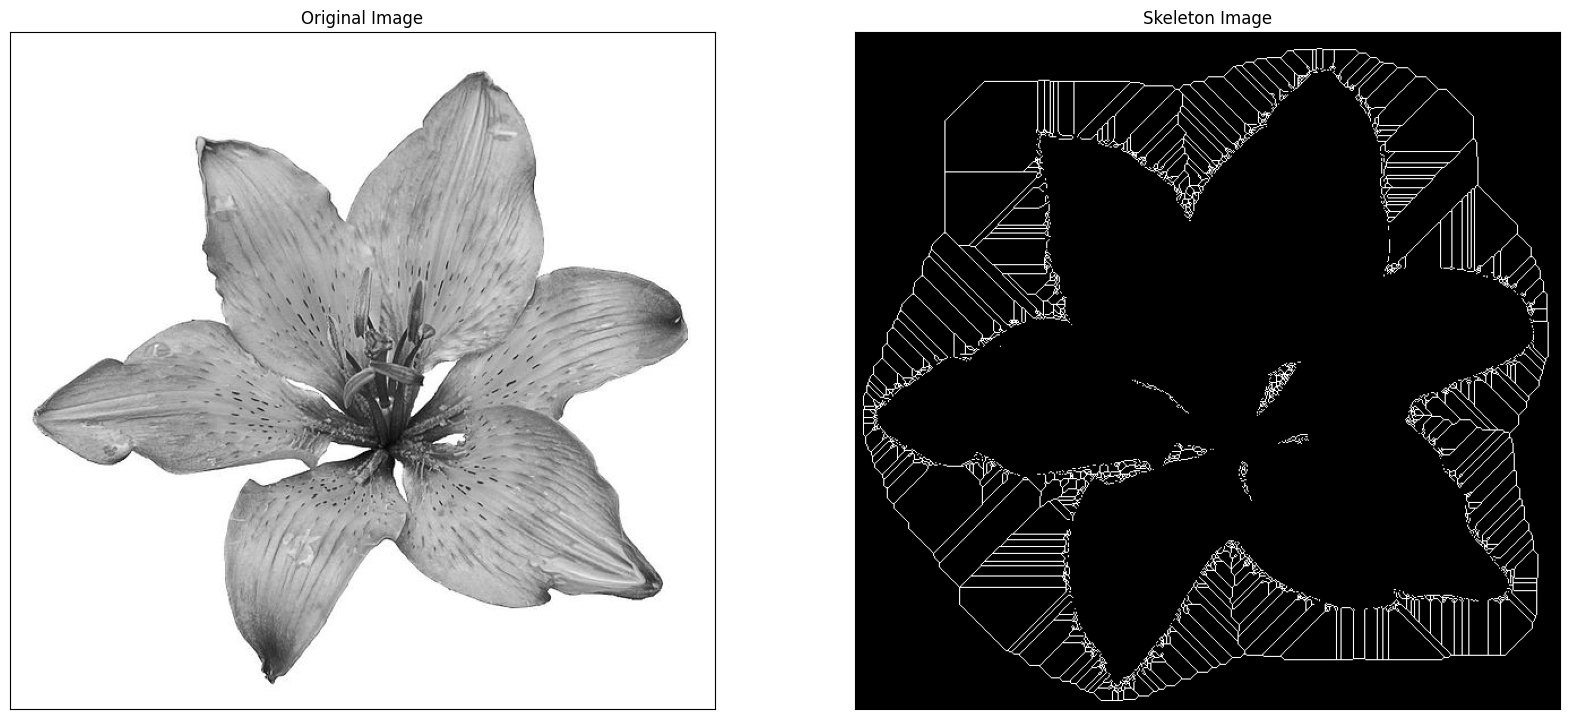

In [96]:
from skimage import io, color,filters, morphology

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/image/lily.jpg', cv2.IMREAD_GRAYSCALE)

# Binarisasi citra menggunakan Threshold Triangle
binary = img > filters.threshold_triangle(img)

# Konversi nilai True/False ke 1/0
binary_cp = binary.astype(np.uint8)

# Lakukan Skeletonization
skeleton = morphology.skeletonize(binary_cp)

# Menampilkan citra asli dan hasil Skeletonization
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Langkah 16
Skeleton Inverse

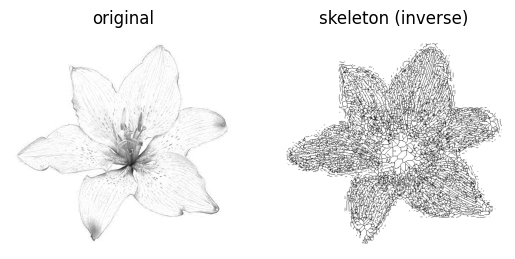

In [111]:
from skimage import io, filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/image/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

## Langkah 17
Thickening

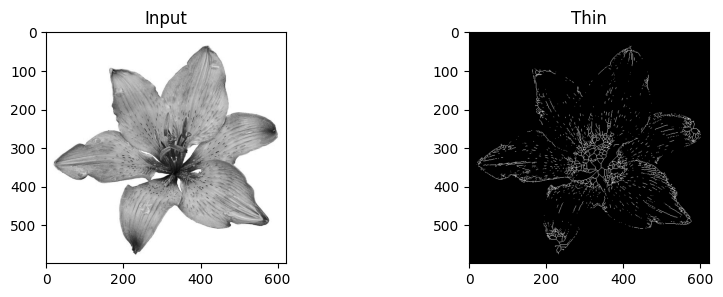

In [115]:
from skimage import io, color, morphology, img_as_float
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/image/lily.jpg')))

# Binarize the image
image_binary = image < 0.5

# Perform skeletonization
out_skeletonize = morphology.skeletonize(image_binary)

# Perform thinning (this is optional, you can skip this if you only want skeletonization)
out_thin = morphology.thin(image_binary)

# Display the original image and the thinned image
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')  # You can change 'out_thin' to 'out_skeletonize' if you want skeletonization
ax1.set_title('Thin')  # You can change 'Thin' to 'Skeletonize' if you want skeletonization
plt.show()


# Tugas Praktikum
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

In [116]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import os
import random
import matplotlib.pyplot as plt